<a href="https://colab.research.google.com/github/marofmar/CVND/blob/master/CVND_L4_Standardize_AvgBrightness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 # computer vision library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils

%matplotlib inline

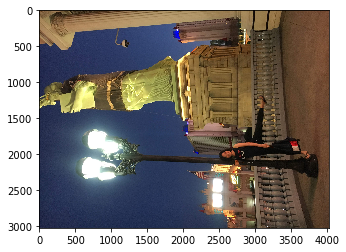

In [7]:
night = mpimg.imread('nvd.JPG')
plt.imshow(night)

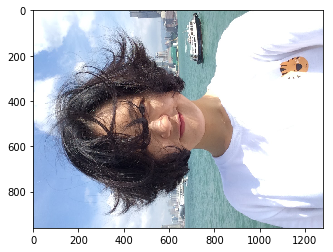

In [8]:
day = mpimg.imread('IMG_4574.JPG')
plt.imshow(day)

In [9]:
print(day.shape, night.shape)

(960, 1280, 3) (3024, 4032, 3)


# Input Standardize

In [0]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [0]:
def standardize_input(image):
    std_img = cv2.resize(image, (1200,900))
    return std_img

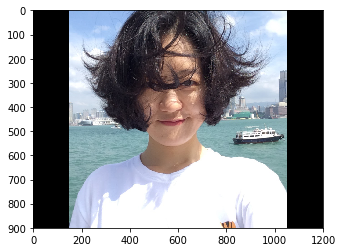

In [23]:
plt.imshow(standardize_input(rotateImage(day, 270)))

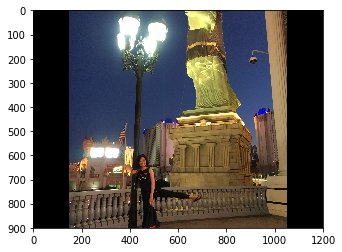

In [24]:
plt.imshow(standardize_input(rotateImage(night, 270)))

# Feature Extraction
## RGB to HSV conversion
### For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]

In [0]:
day_img = standardize_input(day)
night_img = standardize_input(night)

DAY image


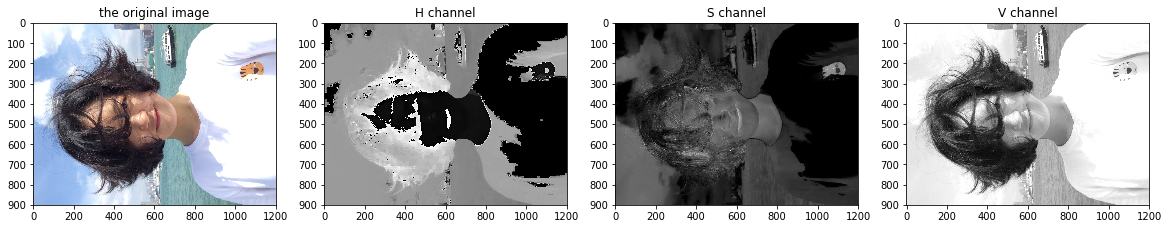

In [27]:
hsv = cv2.cvtColor(day_img, cv2.COLOR_RGB2HSV)
print('DAY image') 

#hsv channel
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,10))
ax1.set_title('the original image')
ax1.imshow(day_img) 
ax2.set_title('H channel')
ax2.imshow(h, cmap = 'gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap = 'gray') 
ax4.set_title('V channel')
ax4.imshow(v, cmap = 'gray')

NIGHT image


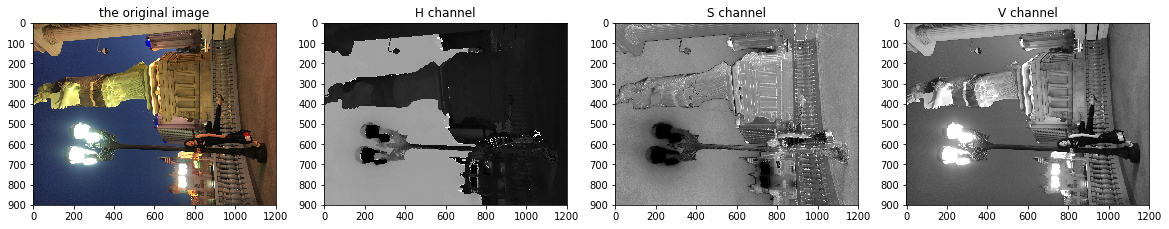

In [29]:
hsv2 = cv2.cvtColor(night_img, cv2.COLOR_RGB2HSV)
print('NIGHT image') 

#hsv channel
h2 = hsv2[:,:,0]
s2 = hsv2[:,:,1]
v2 = hsv2[:,:,2]

# plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,10))
ax1.set_title('the original image')
ax1.imshow(night_img) 
ax2.set_title('H channel')
ax2.imshow(h2, cmap = 'gray')
ax3.set_title('S channel')
ax3.imshow(s2, cmap = 'gray') 
ax4.set_title('V channel')
ax4.imshow(v2, cmap = 'gray')

- Based on the two distinguishly diff results of V channel, 'value' would be the key to classify 'day' and 'night'

# Average brightness using the V channel

In [0]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2]) # sum the V values 
    area = rgb_image.shape[0] * rgb_image.shape[1]
    avg = sum_brightness / area
    #plt.imshow(avg)
    return avg

In [35]:
avg_brightness(day_img)

193.22701481481482

In [36]:
avg_brightness(night_img)

109.43105277777778